In [72]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [73]:
import seaborn as sns
df=sns.load_dataset("mpg")

In [74]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [75]:
df.shape

(398, 9)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [77]:
df.name.nunique()

305

In [78]:
df.drop(["name"], axis=1, inplace=True)

In [79]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [80]:
df.dropna(inplace=True)

In [81]:
df.isnull().sum().any()

False

In [82]:
df.shape

(392, 8)

In [83]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [84]:
from datetime import datetime

In [85]:
today=datetime.today()

In [86]:
this_year=today.year
this_year

2020

In [87]:
df["age"]=this_year-(1900+df.model_year)

In [88]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,age
0,18.0,8,307.0,130.0,3504,12.0,70,usa,50
1,15.0,8,350.0,165.0,3693,11.5,70,usa,50
2,18.0,8,318.0,150.0,3436,11.0,70,usa,50
3,16.0,8,304.0,150.0,3433,12.0,70,usa,50
4,17.0,8,302.0,140.0,3449,10.5,70,usa,50


In [89]:
df.drop(["model_year"], axis=1, inplace=True)

In [90]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,age
0,18.0,8,307.0,130.0,3504,12.0,usa,50
1,15.0,8,350.0,165.0,3693,11.5,usa,50
2,18.0,8,318.0,150.0,3436,11.0,usa,50
3,16.0,8,304.0,150.0,3433,12.0,usa,50
4,17.0,8,302.0,140.0,3449,10.5,usa,50


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   origin        392 non-null    object 
 7   age           392 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [92]:
df2=df.copy()

In [47]:
df=pd.get_dummies(df, drop_first=True)

In [93]:
df2=pd.get_dummies(df) # try the model with df2 to see the difference

In [49]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
281,19.8,6,200.0,85.0,2990,18.2,41,0,1
106,12.0,8,350.0,180.0,4499,12.5,47,0,1
231,15.5,8,400.0,190.0,4325,12.2,43,0,1
52,30.0,4,88.0,76.0,2065,14.5,49,0,0
318,29.8,4,134.0,90.0,2711,15.5,40,1,0
297,25.4,5,183.0,77.0,3530,20.1,41,0,0
314,26.4,4,140.0,88.0,2870,18.1,40,0,1
117,29.0,4,68.0,49.0,1867,19.5,47,0,0
3,16.0,8,304.0,150.0,3433,12.0,50,0,1
259,20.8,6,200.0,85.0,3070,16.7,42,0,1


In [50]:
X=df.drop(["mpg"], axis=1)
y=df["mpg"]

In [51]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,50,0,1
1,8,350.0,165.0,3693,11.5,50,0,1
2,8,318.0,150.0,3436,11.0,50,0,1
3,8,304.0,150.0,3433,12.0,50,0,1
4,8,302.0,140.0,3449,10.5,50,0,1


In [53]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [56]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [57]:
lm.intercept_

79.20294463155588

In [58]:
lm.coef_

array([-0.34210131,  0.01920596, -0.0216204 , -0.00642267,  0.04219811,
       -0.79716146,  0.33046978, -2.87549946])

In [59]:
coeff_parameter = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
cylinders,-0.342101
displacement,0.019206
horsepower,-0.021620
weight,-0.006423
acceleration,0.042198
age,-0.797161
origin_japan,0.330470
origin_usa,-2.875499


In [61]:
y_pred=lm.predict(X_test)

In [68]:
y_pred_train=lm.predict(X_train)

In [62]:
eval_metrics(y_test, y_pred)

r2_score: 0.7922774714022585 
 mae: 2.4619996980661454 
 mse: 10.602279011688351 
 rmse: 3.2561140968473987


In [70]:
eval_metrics(y_train, y_pred_train)

r2_score: 0.8286865575852228 
 mae: 2.5445826417298005 
 mse: 10.809834360243094 
 rmse: 3.287831254830925


In [63]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [64]:
compare.sample(10)

,Actual,Pred
276,21.6,26.902469
30,28.0,22.754263
115,15.0,14.042393
46,22.0,22.366259
255,25.1,25.444675
22,25.0,23.404564
358,31.6,31.628997
296,27.4,26.354141
147,24.0,28.387192
5,15.0,10.232232


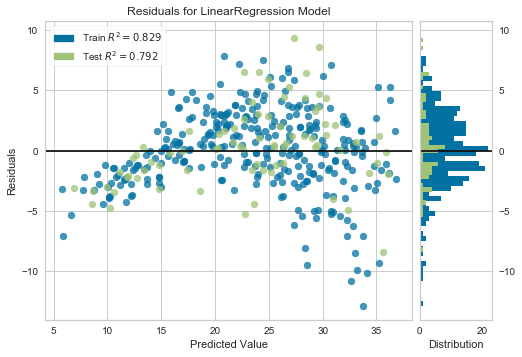

In [65]:
#pip install yellowbrick

from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = lm
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

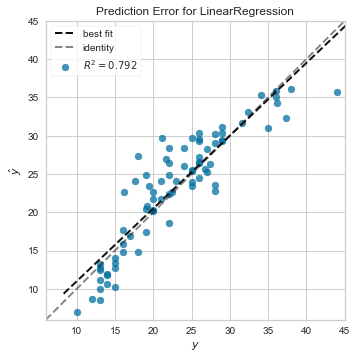

In [71]:
from yellowbrick.regressor import PredictionError


# Instantiate the linear model and visualizer
model = lm
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure